In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [2]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.optimizers import adam_v2

from keras.regularizers import l2
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorboard
from tensorflow import keras
import datetime

%matplotlib inline

In [3]:
clf_model =  Sequential()

clf_model.add(Dense(128, activation='relu', input_dim=512,
                    kernel_regularizer=l2(0.001)))
clf_model.add(Dropout(0.3))

clf_model.add(Dense(1, activation='sigmoid'))

clf_model.summary()

clf_model.compile(optimizer=adam_v2.Adam(learning_rate=0.0001), 
                  loss='binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 65,793
Trainable params: 65,793
Non-trainable params: 0
_________________________________________________________________


In [4]:
X_train= np.load('trained_data/X_train.npy')
y_train=np.load('trained_data/y_train.npy')
X_val=np.load('trained_data/X_val.npy')
y_val=np.load('trained_data/y_val.npy')

In [5]:
def plot_history(history):
    fig, axs = plt.subplots(2)
    # Plot both Loss & Accuracy in Subplot
  # creat accuracy plot
    axs[0].plot(history.history['acc'], label='train accuracy')
    axs[0].plot(history.history['val_acc'], label='test accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='best')
    axs[0].set_title('Accuracy eval')

  # creat loss plot
    axs[1].plot(history.history['loss'], label='train loss')
    axs[1].plot(history.history['val_loss'], label='test loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='best')
    axs[1].set_title('Loss eval')

    plt.show()

Epoch 1/50
60/60 - 1s - loss: 0.9075 - acc: 0.5944 - val_loss: 0.7860 - val_acc: 0.7000 - 971ms/epoch - 16ms/step
Epoch 2/50
60/60 - 0s - loss: 0.8317 - acc: 0.6611 - val_loss: 0.6729 - val_acc: 0.7818 - 205ms/epoch - 3ms/step
Epoch 3/50
60/60 - 0s - loss: 0.6608 - acc: 0.8111 - val_loss: 0.6233 - val_acc: 0.8000 - 204ms/epoch - 3ms/step
Epoch 4/50
60/60 - 0s - loss: 0.6142 - acc: 0.7889 - val_loss: 0.5600 - val_acc: 0.8500 - 210ms/epoch - 3ms/step
Epoch 5/50
60/60 - 0s - loss: 0.6036 - acc: 0.7833 - val_loss: 0.5316 - val_acc: 0.8727 - 308ms/epoch - 5ms/step
Epoch 6/50
60/60 - 0s - loss: 0.5216 - acc: 0.8389 - val_loss: 0.5277 - val_acc: 0.8773 - 327ms/epoch - 5ms/step
Epoch 7/50
60/60 - 1s - loss: 0.5334 - acc: 0.8278 - val_loss: 0.5313 - val_acc: 0.8409 - 517ms/epoch - 9ms/step
Epoch 8/50
60/60 - 0s - loss: 0.4821 - acc: 0.8722 - val_loss: 0.4776 - val_acc: 0.9045 - 345ms/epoch - 6ms/step
Epoch 9/50
60/60 - 0s - loss: 0.4491 - acc: 0.8944 - val_loss: 0.4590 - val_acc: 0.9000 - 381ms

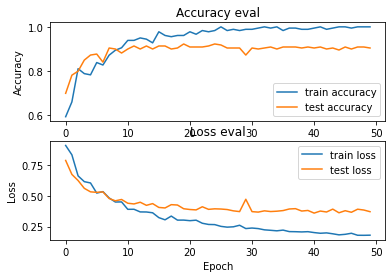

In [6]:


logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

res = clf_model.fit(X_train, y_train.reshape(-1, 1), epochs=50, batch_size=3,
              validation_data=(X_val, y_val.reshape(-1, 1)), verbose=2,callbacks=[tensorboard_callback])

plot_history(res)

In [7]:
from ann_visualizer.visualize import ann_viz
ann_viz(clf_model, view=True, filename='cconstruct_model', title='CNN — Model 1 — Simple Architecture')

In [16]:
%tensorboard --logdir logs

In [9]:
X_test = np.load('trained_data/X_test.npy')

In [10]:
preds = clf_model.predict(X_test)

In [11]:
for i in range(len(preds)):
    if preds[i] >= 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

In [12]:
predictions = pd.DataFrame()
predictions["id"] = np.arange(1, 81)
predictions["target"] = preds

predictions.to_csv('DogVSCat.csv', index=False, header=predictions.columns)
predictions.head(10)

,id,target
0,1,1.0
1,2,0.0
2,3,0.0
3,4,1.0
4,5,1.0
5,6,0.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,0.0


In [13]:
predictions['target'].value_counts()

0.0    48
1.0    32
Name: target, dtype: int64

In [14]:
# To Save your model if you want
# clf_model.save('saved_model/my_model')
# To reload Your model
# new_model =load_model('saved_model/my_model')